In [3]:
import json
import os
import glob
import pprint

 
count = 0
answers_dict = {'narr_answers': []}
path = r'C:\\Users\\maganti\\Documents\\INFO 5502 Chen Sir Project UNT\\Web Scraping Interviews\\Narrators Json Files-With Q&A'
for filename in glob.glob(os.path.join(path, '*.json')): #only process .JSON files in folder.     
    #print(filename)
    narrators_answers_corpus = ""
    with open(filename, mode = 'rb') as currentFile:
        data = json.loads(currentFile.read())
        try:
            if data['transcript'] != {}:
                for segment in data["transcript"].keys():
                    for question in data["transcript"][segment]['Segment Q&A'].keys():
                        #answers_sentiments[data["transcript"][segment]['Segment Q&A'][question]] = sentiment_scores(data["transcript"][segment]['Segment Q&A'][question])
                        #print(data["transcript"][segment]['Segment Q&A'][question])
                        narrators_answers_corpus = narrators_answers_corpus + " " + data["transcript"][segment]['Segment Q&A'][question]
                        count = count + 1
                        #print()
                        #for answer in data["transcript"][segment]['Segment Q&A'][question]:
                        #    print(answer)
                        #segment_questions_list.append(' '.join(i for i in question.split()[1:]))
                        #print(' '.join(i for i in question.split()[1:]))
                        #print(data['transcript'][segment]['Segment Questions'][question])
                #print(count)    
                
            else:
                pass
        except Exception as e:
            print(e)
    #if narrators_answers_corpus != "":
    answers_dict['narr_answers'].append(narrators_answers_corpus) 
#print(len(segment_questions_list))
print()


In [4]:
import pandas as pd
df = pd.DataFrame(answers_dict)
df['narr_answers'] = df['narr_answers'].str.lower()
#print(df['narr_answers'])

In [3]:
df['narr_answers'] = df['narr_answers'].str.replace('[^a-zA-Z0-9 ]', '')

C:\Users\maganti\AppData\Local\Temp/ipykernel_14096/1017421635.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['narr_answers'] = df['narr_answers'].str.replace('[^a-zA-Z0-9 ]', '')


In [5]:
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim
import re
import pyLDAvis#.gensim
import pyLDAvis.gensim_models
#from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [6]:
from stop_words import get_stop_words
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))

In [7]:
print((set(list(STOPWORDS)) | set(list(stop_words))))
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
print(type(list(STOPWORDS)))
print(type((stop_words)))
print(len(stopwords))

{'own', 'haven', 'o', 'up', 'ain', 'before', 'to', 'and', 'be', 've', 'there', "she's", 'did', 'who', 'should', "couldn't", "they're", "she'll", 'most', "who's", 'mightn', 'a', 'about', 'would', 'does', 'has', 'shan', "why's", 'very', "hadn't", 'we', 'is', 'isn', 'hasn', "they'd", "that's", 'won', 'just', 'down', "wasn't", 'each', 'in', 'which', 'ours', 'few', "where's", 'being', "aren't", 'the', "here's", 'why', "wouldn't", "that'll", 'needn', 'until', 'cannot', 'no', "i'll", 'how', 'you', "shouldn't", 'ought', "needn't", 'myself', 'between', 'their', "i'm", 'herself', 'an', "should've", "weren't", "i've", 'only', 'will', "when's", "i'd", 'again', "doesn't", 'same', 'he', 'his', 'him', "hasn't", 'at', 'over', 'do', "you've", "how's", 'your', 'as', 'after', "we'd", 'could', 'hadn', "mustn't", 'whom', 't', 'other', 'yourselves', 'am', 'this', 'm', 'out', "shan't", 'themselves', 'have', 'what', 'hers', 'these', 'all', "he'd", "he's", 'll', "what's", 'wasn', 'yours', 'can', 'wouldn', "she

In [8]:
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]

In [9]:
df['clean_narr_answers'] = df['narr_answers'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


In [56]:
'for' in stop_words

True

In [11]:
texts = []
lemmatizer = WordNetLemmatizer()
# loop through document list
for i in df['clean_narr_answers']:
    # clean and tokenize document string
    #raw = str(i[1]).lower()
    #tokens = tokenizer.tokenize(raw)
    tokens = i.split()
    # remove stop words from tokens
    #stop_words = stopwords.words('english')
    #stopped_tokens = [raw for raw in tokens if not raw in stop_words]
    
    # remove stop words from tokens
    #stopped_tokens_new = [raw for raw in stopped_tokens if not raw in remove_words]
    
    # lemmatize tokens
    
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # remove word containing only single char
    new_lemma_tokens = [raw for raw in lemma_tokens if not len(raw) == 1]
    
    lemmatized_string = " ".join(token for token in new_lemma_tokens)
    
    
    import nltk
    #word_data = "The best performance can bring in sky high success."
    nltk_tokens = nltk.word_tokenize(lemmatized_string)
    #print(list(nltk.bigrams(nltk_tokens)))
    texts.append([ele[0]+ " " + ele[1] for ele in list(nltk.bigrams(nltk_tokens))])

# sample data
#print(texts[8])

In [12]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [13]:
coherence_score_vs_topics = {}
for num in range(10, 25):
    print("No of topics:",num)
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num, id2word = dictionary, passes=20)
    #import pprint
    #pprint.pprint(ldamodel.top_topics(corpus,topn=5))


    from gensim.models import CoherenceModel

    # Compute Perplexity
    print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    coherence_score_vs_topics[num] = coherence_lda
    print()

No of topics: 10

Perplexity:  -15.194041991608781

Coherence Score:  0.28016172792258676

No of topics: 11

Perplexity:  -15.636926547226299

Coherence Score:  0.2528203252076886

No of topics: 12

Perplexity:  -16.644957643394118

Coherence Score:  0.42849491116590416

No of topics: 13

Perplexity:  -17.265100287890604

Coherence Score:  0.4108185884506593

No of topics: 14

Perplexity:  -17.47321067750119

Coherence Score:  0.4164173228668698

No of topics: 15

Perplexity:  -18.1592991185747

Coherence Score:  0.37651495372449817

No of topics: 16

Perplexity:  -18.73648076833033

Coherence Score:  0.4318969468678755

No of topics: 17

Perplexity:  -19.43644303294838

Coherence Score:  0.4829006866679104

No of topics: 18

Perplexity:  -19.802252534512515

Coherence Score:  0.4460089000940451

No of topics: 19

Perplexity:  -20.42281527500499

Coherence Score:  0.4519600337519683

No of topics: 20

Perplexity:  -20.98408493900914

Coherence Score:  0.4095287100768168

No of topics: 

In [14]:
topic_coherence_score_df = pd.DataFrame(coherence_score_vs_topics.items(), columns = ['No.of Topics', 'Coherence score'])

In [15]:
topic_coherence_score_df = topic_coherence_score_df.astype({"No.of Topics": str})

C:\Users\maganti\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\maganti\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\maganti\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\maganti\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\maganti\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version ins

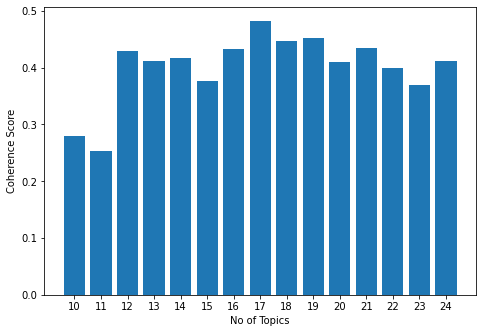

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel("No of Topics")
plt.ylabel("Coherence Score")
ax.bar(topic_coherence_score_df['No.of Topics'],topic_coherence_score_df['Coherence score'])
plt.show()

. We can observe that at 17 topics, there is good coherence score.